<a href="https://colab.research.google.com/github/helloitsdaksh/Minor-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

#Import Data 

In [3]:
!ls drive/MyDrive/Projected_impacts_datasheet_11.24.2021.xlsx

drive/MyDrive/Projected_impacts_datasheet_11.24.2021.xlsx


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
df = pd.read_excel("Projected_impacts_datasheet_11.24.2021.xlsx")

##Walk Through the Data

In [6]:
df.describe()

,ID,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),Current Annual Precipitation (mm) _area_weighted,Current Annual Precipitation (mm) _point_coordinate,Future_Mid-point,Baseline_Mid-point,Local delta T,...,Climate impacts (%),Climate impacts relative to 2005,Climate impacts per dC (%),Climate impacts per decade (%),CO2 ppm,Publication year,Seasonal Precipitation change (mm) each study (local baseperiod),Base precipitation (annual) (mm) (local base period),Annual Preciptation change (%) (relative to local base),Base precipitation (seasonal) (mm) (local base period)
count,8703.00000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8703.000000,8702.000000,4392.000000,...,8703.000000,8703.000000,8703.000000,8703.000000,8538.000000,8703.000000,386.000000,1917.000000,366.000000,189.000000
mean,4352.00000,25.185816,32.340434,17.804514,17.252870,974.121895,962.207224,2055.435482,1986.571248,2.095515,...,-7.837566,-6.976058,-5.030708,-1.576233,514.895029,2014.038837,50.695555,862.841427,4.425903,668.146545
std,2512.48403,22.770279,69.821017,7.111171,8.282561,538.116430,693.195670,22.553559,13.148001,1.207587,...,24.807447,21.519675,17.988020,5.253247,114.081462,5.256125,157.213514,577.562989,7.624984,397.076905
min,1.00000,-38.416100,-122.000000,-8.371055,-8.371055,0.967242,0.967242,2000.000000,1965.000000,0.180000,...,-100.000000,-100.000000,-158.227848,-40.777778,330.000000,1984.000000,-335.800000,42.700000,-22.463600,154.000000
25%,2176.50000,14.058300,2.213750,11.848694,11.119357,605.289909,421.181280,2030.000000,1975.000000,1.127000,...,-17.634600,-13.103754,-7.704895,-2.678499,431.450000,2014.000000,-6.396000,467.000000,0.600000,381.000000
50%,4352.00000,32.403950,34.888800,17.663128,17.087790,907.985051,839.157841,2055.000000,1975.000000,1.807000,...,-4.592310,-2.782084,-1.944647,-0.701507,486.535320,2014.000000,4.195100,675.000000,4.790000,525.316500
75%,6527.50000,40.339900,90.356300,24.380180,24.863827,1264.254206,1254.342238,2080.000000,2002.000000,2.800000,...,5.025218,3.324415,2.181967,0.743806,550.500000,2017.000000,53.153200,1314.000000,7.000000,815.000000
max,8703.00000,61.924110,151.750000,30.500914,30.500914,3248.452253,3891.503190,2110.000000,2016.000000,6.600000,...,186.873000,135.907636,153.710247,26.153333,935.874370,2020.000000,791.000000,3300.000000,25.333333,1803.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 52 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                8703 non-null   float64
 1   Ref No                                                            8703 non-null   object 
 2    Methods                                                          8703 non-null   object 
 3   Scale                                                             8703 non-null   object 
 4   Crop                                                              8703 non-null   object 
 5   Country                                                           8703 non-null   object 
 6   Site(location)                                                    2694 non-null   object 
 7   Region                           

In [8]:
clean_data = df.drop(df.columns[41:], axis=1)

In [9]:
clean_data = clean_data.drop(clean_data.columns[[6,19,21,25]],axis = 1)

In [10]:
clean_data.isna().sum()

ID                                                        0
Ref No                                                    0
 Methods                                                  0
Scale                                                     0
Crop                                                      0
Country                                                   0
Region                                                    0
latitude                                                 37
longitude                                                37
Current Average Temperature (dC)_area_weighted           37
Current Average Temperature_point_coordinate (dC)        37
Current Annual Precipitation (mm) _area_weighted         37
Current Annual Precipitation  (mm) _point_coordinate     37
Future_Mid-point                                          0
Baseline_Mid-point                                        1
Time slice                                                0
Climate scenario                        

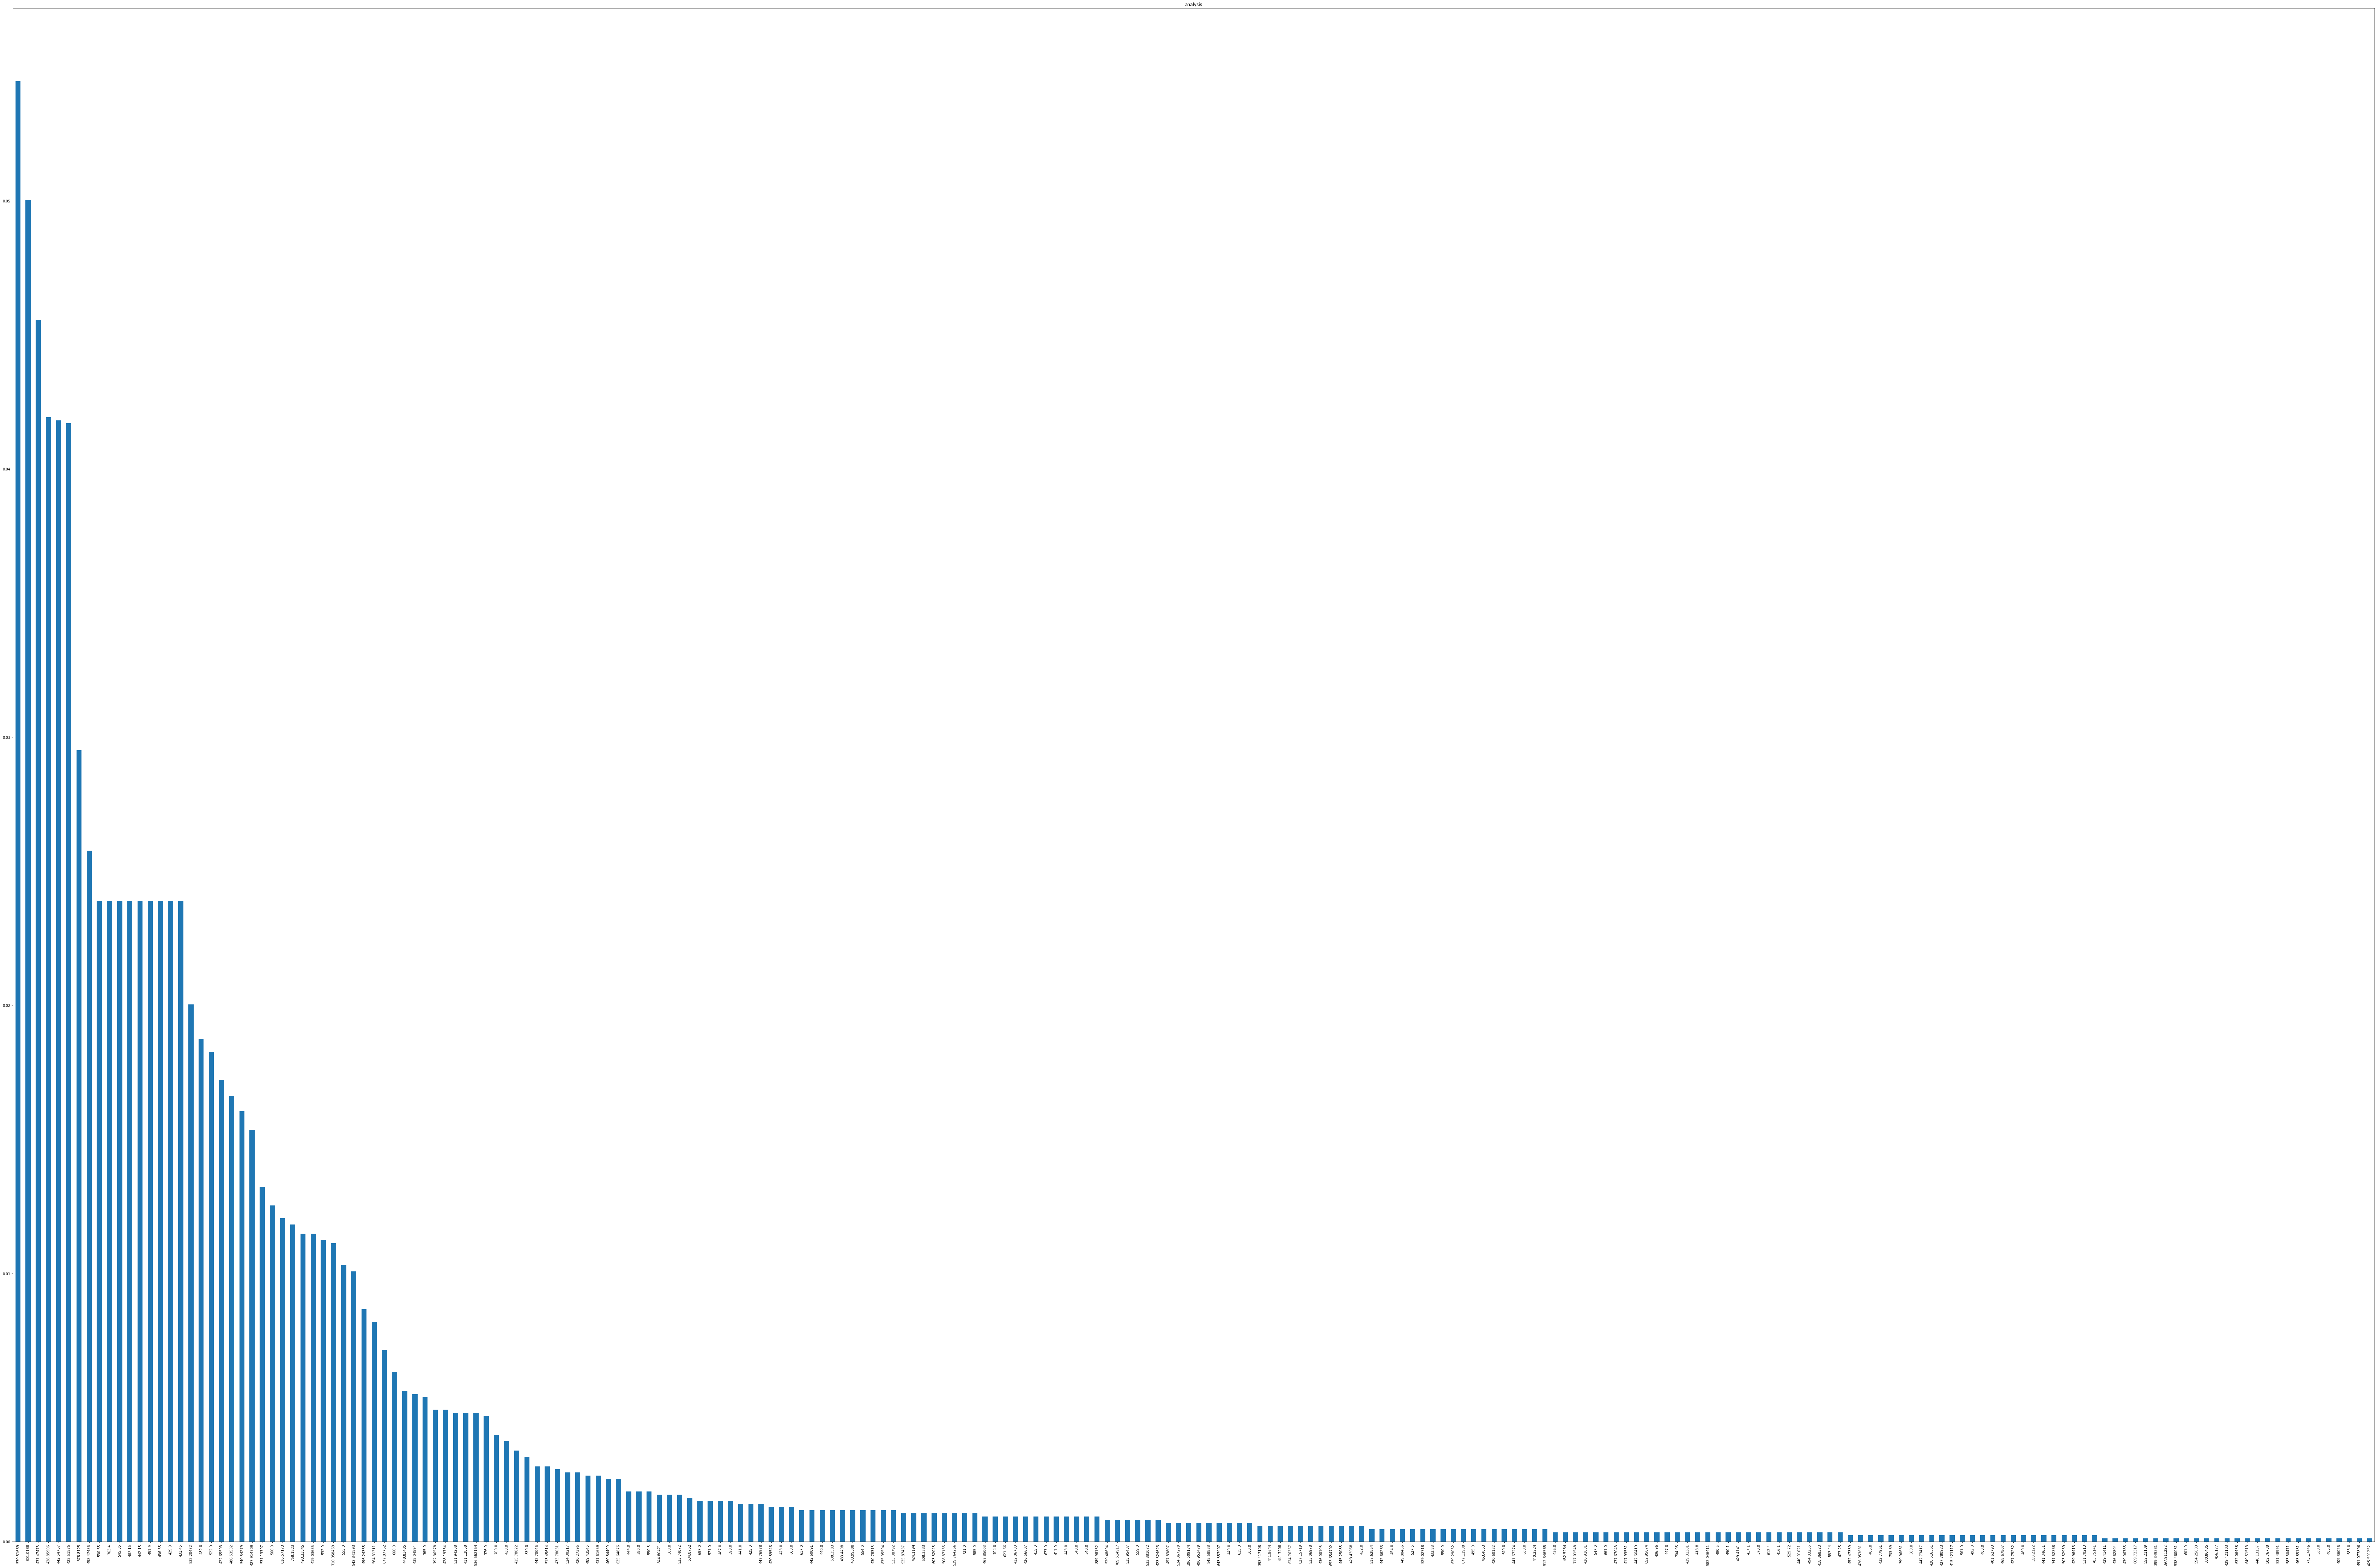

In [11]:
plt.figure(figsize=(120,80))
ax1 = clean_data['CO2 ppm'].value_counts(normalize=True).plot.bar(title='analysis')
plt.show()

In [12]:
clean_data['CO2 ppm'].fillna(clean_data['CO2 ppm'].mean(), inplace = True)

In [17]:
df[df.columns[df.isnull().any()]].isnull().sum()

Site(location)                                                      6009
latitude                                                              37
longitude                                                             37
Current Average Temperature (dC)_area_weighted                        37
Current Average Temperature_point_coordinate (dC)                     37
Current Annual Precipitation (mm) _area_weighted                      37
Current Annual Precipitation  (mm) _point_coordinate                  37
Baseline_Mid-point                                                     1
Local delta T                                                       4311
Local delta T from 2005                                               37
Annual Precipitation change each study  (mm)                        5149
 Annual Precipitation change  from 2005 (mm)                          37
Projected yield (t/ha)                                              5283
CO2 ppm                                            

In [13]:
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

latitude                                                37
longitude                                               37
Current Average Temperature (dC)_area_weighted          37
Current Average Temperature_point_coordinate (dC)       37
Current Annual Precipitation (mm) _area_weighted        37
Current Annual Precipitation  (mm) _point_coordinate    37
Baseline_Mid-point                                       1
Local delta T from 2005                                 37
 Annual Precipitation change  from 2005 (mm)            37
dtype: int64

In [19]:
clean_data = clean_data.dropna(subset=['latitude'])

In [20]:
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

Baseline_Mid-point    1
dtype: int64

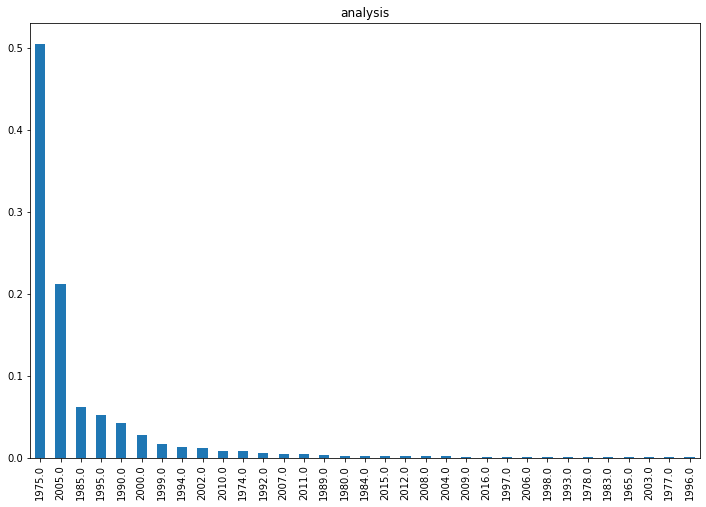

In [22]:
plt.figure(figsize=(12,8))
ax1 = clean_data['Baseline_Mid-point'].value_counts(normalize=True).plot.bar(title='analysis')
plt.show()

In [30]:
clean_data['Baseline_Mid-point'].fillna(clean_data['Baseline_Mid-point'].mode()[0], inplace = True)

In [31]:
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

DATA IS CLEANED

#EDA

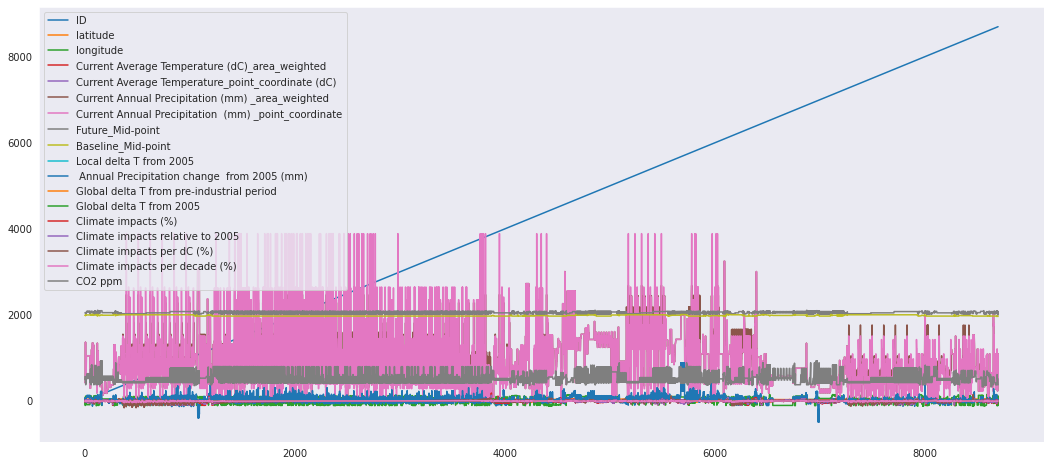

In [34]:
sns.set_style('dark')
clean_data.plot(figsize=(18, 8))
plt.show()

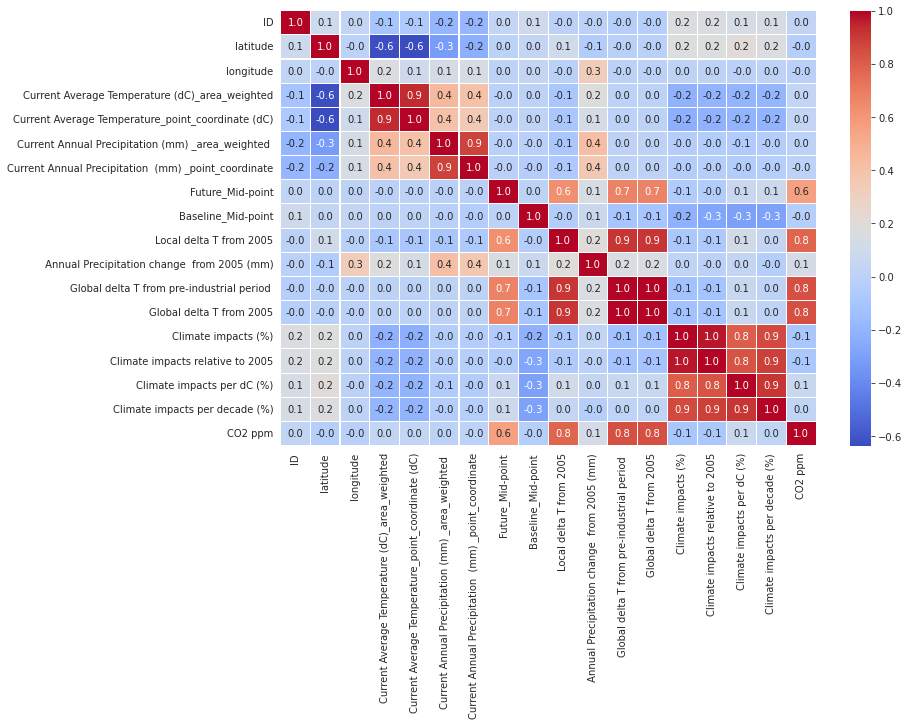

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(clean_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()